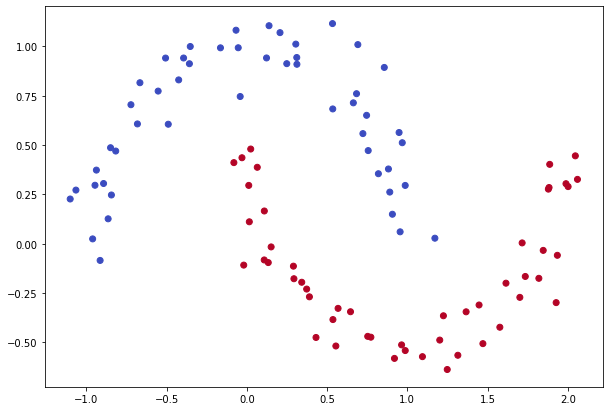

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X, y = datasets.make_moons(100, noise=0.10)
x1 = X[:,0]
x2 = X[:,1]

plt.figure(figsize=(10,7))
plt.scatter(x1, x2, c= y, cmap=plt.cm.coolwarm)

In [0]:
y = y.reshape(y.shape[0],1)

In [4]:
print(X.shape)
print(y.shape)


(100, 2)
(100, 1)


In [0]:
def define_parameters(weights):
    weight_list = []
    bias_list = []
    for i in range(len(weights) - 1):
        
        w = np.random.randn(weights[i], weights[i+1])
        b = np.random.randn()

        weight_list.append(w)
        bias_list.append(b)
    
    return weight_list, bias_list

In [0]:
def sigmoid(x):
    return 1/(1+np.exp(-x))


In [0]:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))


In [0]:
def predictions(w, b, X):
    zh = np.dot(X,w[0]) + b[0]
    ah = sigmoid(zh)

    zo = np.dot(ah, w[1]) + b[1]
    ao = sigmoid(zo)
    return ao


In [0]:
def find_cost(ao,y):
    m = y.shape[0]
    total_cost = (1/m) * np.sum(np.square(ao - y))
    return total_cost


In [0]:
def find_derivatives(w, b, X):

    zh = np.dot(X,w[0]) + b[0]
    ah = sigmoid(zh)

    zo = np.dot(ah, w[1]) + b[1]
    ao = sigmoid(zo)

    # Back propagation phase 1
    m = y.shape[0]
    dcost_dao = (1/m)*(ao-y)
    dao_dzo = sigmoid_der(zo)
    dzo_dwo = ah.T
   
    dwo =  np.dot(dzo_dwo, dcost_dao * dao_dzo)
    dbo = np.sum(dcost_dao * dao_dzo)
    
    # Back propagation phase 2
    
    # dcost_wh = dcost_dah * dah_dzh * dzh_dwh
    # dcost_dah = dcost_dzo * dzo_dah

    dcost_dzo = dcost_dao * dao_dzo
    dzo_dah = w[1].T

    dcost_dah = np.dot(dcost_dzo ,  dzo_dah)

    dah_dzh = sigmoid_der(zh) 
    dzh_dwh = X.T
    dwh = np.dot(dzh_dwh, dah_dzh * dcost_dah)
    dbh = np.sum(dah_dzh * dcost_dah)

    return dwh, dbh, dwo, dbo


In [0]:
def update_weights(w,b,dwh, dbh, dwo, dbo, lr):
    w[0] = w[0] - lr * dwh
    w[1] = w[1] - lr * dwo

    b[0] = b[0] - lr * dbh
    b[1] = b[1] - lr * dbo

    return w, b

In [0]:
def my_neural_network(X, y, lr, epochs):
    error_list = []
    input_len = X.shape[1]
    output_len = y.shape[1]
    w,b = define_parameters([input_len, 4, output_len])

    for i in range(epochs):
        ao = predictions(w, b, X)
        cost = find_cost(ao, y)
        error_list.append(cost)
        dwh, dbh, dwo, dbo = find_derivatives (w, b, X)
        w, b = update_weights(w, b, dwh, dbh, dwo, dbo,  lr )
        if i % 50 == 0 :
            print(cost)
            
    return w, b, error_list


In [48]:
lr = 0.5
epochs = 2000
w, b, error_list = my_neural_network(X,y,lr,epochs)


0.1980211046202944
0.14097327813016874
0.1199356196746553
0.10996149384567079
0.1046354602995857
0.10125014770369335
0.09877988582294377
0.09681954900387213
0.09519153134310644
0.09380667924462933
0.09261322597192048
0.09157694024355723
0.09067287831113126
0.0898816633148205
0.08918762513676567
0.08857775866745798
0.0880410781190082
0.08756818639880107
0.08715097414153263
0.08678240229725143
0.08645634002244419
0.08616743928189777
0.08591103380363199
0.08568305442008338
0.0854799559120146
0.08529865252129894
0.08513646055443663
0.08499104719247362
0.08486038495701591
0.08474271141085092
0.08463649370001301
0.08454039753494193
0.08445326019470517
0.08437406713419247
0.08430193178325884
0.08423607814745766
0.0841758258488823
0.08412057727921075
0.08406980657236514
0.08402305013908634


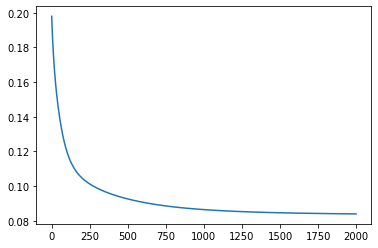

In [49]:
plt.plot(error_list)

In [56]:
print(X[50])
print(y[50])

[1.71571634 0.00383596]
[1]


In [57]:
single_point = np.array([1.71571634, 0.00383596])
result = predictions(w, b, single_point)

print(result)

[0.9206903]
